# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings

In [3]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
df = pd.read_parquet('2023-1.parquet')
df.info()
row_count=len(df)
print('Number of rows are ',row_count)

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('data')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        file_df=pd.read_parquet(file_path)
        file_df['tpep_pickup_datetime']=pd.to_datetime(file_df['tpep_pickup_datetime'])
        file_df['pickup_date']=file_df['tpep_pickup_datetime'].dt.date
        file_df['pickup_hour']=file_df['tpep_pickup_datetime'].dt.hour

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        sampled_data=(
            file_df.groupby(['pickup_date','pickup_hour'],group_keys=False).apply(lambda x:x.sample(frac=0.05))
        )
        print(f'Sampled data has {len(sampled_data)} rows')
        
        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df=pd.concat([df,sampled_data],ignore_index=True)
        print(f'Total dataframe has {len(df)} rows')

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")


C:\Users\User\AppData\Local\Temp\ipykernel_5720\1853654341.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  file_df.groupby(['pickup_date','pickup_hour'],group_keys=False).apply(lambda x:x.sample(frac=0.05))


Sampled data has 152087 rows
Total dataframe has 152087 rows


C:\Users\User\AppData\Local\Temp\ipykernel_5720\1853654341.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  file_df.groupby(['pickup_date','pickup_hour'],group_keys=False).apply(lambda x:x.sample(frac=0.05))


Sampled data has 174255 rows
Total dataframe has 326342 rows


C:\Users\User\AppData\Local\Temp\ipykernel_5720\1853654341.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  file_df.groupby(['pickup_date','pickup_hour'],group_keys=False).apply(lambda x:x.sample(frac=0.05))


Sampled data has 165133 rows
Total dataframe has 491475 rows


C:\Users\User\AppData\Local\Temp\ipykernel_5720\1853654341.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  file_df.groupby(['pickup_date','pickup_hour'],group_keys=False).apply(lambda x:x.sample(frac=0.05))


Sampled data has 166709 rows
Total dataframe has 658184 rows


C:\Users\User\AppData\Local\Temp\ipykernel_5720\1853654341.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  file_df.groupby(['pickup_date','pickup_hour'],group_keys=False).apply(lambda x:x.sample(frac=0.05))


Sampled data has 168696 rows
Total dataframe has 826880 rows


C:\Users\User\AppData\Local\Temp\ipykernel_5720\1853654341.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  file_df.groupby(['pickup_date','pickup_hour'],group_keys=False).apply(lambda x:x.sample(frac=0.05))


Sampled data has 163786 rows
Total dataframe has 990666 rows


C:\Users\User\AppData\Local\Temp\ipykernel_5720\1853654341.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  file_df.groupby(['pickup_date','pickup_hour'],group_keys=False).apply(lambda x:x.sample(frac=0.05))


Sampled data has 139641 rows
Total dataframe has 1130307 rows


C:\Users\User\AppData\Local\Temp\ipykernel_5720\1853654341.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  file_df.groupby(['pickup_date','pickup_hour'],group_keys=False).apply(lambda x:x.sample(frac=0.05))


Sampled data has 144458 rows
Total dataframe has 1274765 rows


C:\Users\User\AppData\Local\Temp\ipykernel_5720\1853654341.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  file_df.groupby(['pickup_date','pickup_hour'],group_keys=False).apply(lambda x:x.sample(frac=0.05))


Sampled data has 162910 rows
Total dataframe has 1437675 rows


C:\Users\User\AppData\Local\Temp\ipykernel_5720\1853654341.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  file_df.groupby(['pickup_date','pickup_hour'],group_keys=False).apply(lambda x:x.sample(frac=0.05))


Sampled data has 174068 rows
Total dataframe has 1611743 rows


C:\Users\User\AppData\Local\Temp\ipykernel_5720\1853654341.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  file_df.groupby(['pickup_date','pickup_hour'],group_keys=False).apply(lambda x:x.sample(frac=0.05))


Sampled data has 143782 rows
Total dataframe has 1755525 rows


C:\Users\User\AppData\Local\Temp\ipykernel_5720\1853654341.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  file_df.groupby(['pickup_date','pickup_hour'],group_keys=False).apply(lambda x:x.sample(frac=0.05))


Sampled data has 140875 rows
Total dataframe has 1896400 rows


C:\Users\User\AppData\Local\Temp\ipykernel_5720\1853654341.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  file_df.groupby(['pickup_date','pickup_hour'],group_keys=False).apply(lambda x:x.sample(frac=0.05))


Sampled data has 94927 rows
Total dataframe has 1991327 rows


C:\Users\User\AppData\Local\Temp\ipykernel_5720\1853654341.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  file_df.groupby(['pickup_date','pickup_hour'],group_keys=False).apply(lambda x:x.sample(frac=0.05))


Sampled data has 94927 rows
Total dataframe has 2086254 rows


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [11]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet('final_sampled_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [39]:
# Load the new data file
df = pd.read_parquet('final_sampled_data.parquet')

In [41]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:54:11   2023-01-01 00:02:30              2.0   
1         2  2023-01-01 00:06:39   2023-01-01 00:10:02              1.0   
2         2  2023-01-01 00:21:40   2023-01-01 00:33:27              3.0   
3         2  2023-01-01 00:42:44   2023-01-01 01:41:04              1.0   
4         2  2023-01-01 00:31:05   2023-01-01 01:11:40              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.82         1.0                  N            90           107   
1           0.52         1.0                  N           237           237   
2           2.12         1.0                  N           114           137   
3          12.91         1.0                  N            50            91   
4          19.52         2.0                  N           132           158   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        2.04          0.00   
1             2  ...      0.5        0.00          0.00   
2             1  ...      0.5        3.56          0.00   
3             1  ...      0.5       15.65          6.55   
4             1  ...      0.5       16.72          8.36   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         15.64                   2.5         0.00   
1                    1.0         10.10                   2.5         0.00   
2                    1.0         21.36                   2.5         0.00   
3                    1.0         93.90                   2.5         0.00   
4                    1.0        100.33                   2.5         1.25   

   pickup_date  pickup_hour Airport_fee  
0   2022-12-31           23         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [17]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086254 entries, 0 to 2086253
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [43]:
# Fix the index and drop any columns that are not needed
df=df.reset_index(drop=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [45]:
# Combine the two airport fee columns
df['airport_fee']=df['Airport_fee'].fillna(df['airport_fee'].fillna(0))
df=df.drop('Airport_fee',axis=1)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [47]:
# check where values of fare amount are negative
negative_mask=df['total_amount']<0
negative_records=df.loc[negative_mask].copy()
negative_records.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3986          2  2023-01-02 06:32:52   2023-01-02 07:05:44              1.0   
74156         2  2023-01-16 17:32:53   2023-01-16 17:33:01              1.0   
74218         2  2023-01-16 17:53:43   2023-01-16 18:44:52              1.0   
77131         2  2023-01-17 12:37:35   2023-01-17 13:24:00              1.0   
88880         2  2023-01-19 16:53:08   2023-01-19 17:17:50              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3986           16.71         2.0                  N           132   
74156           0.00         3.0                  N           238   
74218          19.18         2.0                  N           132   
77131          17.68         2.0                  N           230   
88880           0.00         2.0                  N           238   

       DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
3986             50             2  ...    0.0     -0.5         0.0   
74156           238             2  ...    0.0      0.0         0.0   
74218           142             2  ...    0.0     -0.5         0.0   
77131           132             2  ...    0.0     -0.5         0.0   
88880           238             2  ...    0.0     -0.5         0.0   

       tolls_amount  improvement_surcharge  total_amount  \
3986            0.0                   -1.0         -5.25   
74156           0.0                   -1.0         -1.00   
74218           0.0                   -1.0         -5.25   
77131           0.0                   -1.0         -4.00   
88880           0.0                   -1.0         -4.00   

       congestion_surcharge  airport_fee  pickup_date pickup_hour  
3986                   -2.5        -1.25   2023-01-02           6  
74156                   0.0         0.00   2023-01-16          17  
74218                  -2.5        -1.25   2023-01-16          17  
77131                  -2.5         0.00   2023-01-17          12  
88880                  -2.5         0.00   2023-01-19          16  

[5 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [25]:
# Analyse RatecodeID for the negative fare amounts
negative_records['RatecodeID'].value_counts()



RatecodeID
1.0    43
2.0    38
5.0     4
3.0     3
Name: count, dtype: int64

In [49]:
# Find which columns have negative values
numeric_cols = df.select_dtypes(include=['number'])
print(numeric_cols)

         VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
0               2              2.0           0.82         1.0            90   
1               2              1.0           0.52         1.0           237   
2               2              3.0           2.12         1.0           114   
3               2              1.0          12.91         1.0            50   
4               2              1.0          19.52         2.0           132   
...           ...              ...            ...         ...           ...   
2086249         2              2.0           1.20         1.0           234   
2086250         2              NaN           5.86         NaN           129   
2086251         2              NaN           6.97         NaN            36   
2086252         2              NaN           1.66         NaN           262   
2086253         2              1.0           0.57         1.0           237   

         DOLocationID  payment_type  fare_amount  e

In [51]:
# fix these negative values
negative_columns = numeric_cols.columns[(numeric_cols < 0).any()].tolist()
print("Columns with negative values:", negative_columns)

Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [57]:
# Find the proportion of missing values in each column
missing_proportion = df.isnull().mean() * 100 
print(missing_proportion)
df.head()

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               3.446225
store_and_fwd_flag       3.446225
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.446225
airport_fee              0.000000
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:54:11   2023-01-01 00:02:30              2.0   
1         2  2023-01-01 00:06:39   2023-01-01 00:10:02              1.0   
2         2  2023-01-01 00:21:40   2023-01-01 00:33:27              3.0   
3         2  2023-01-01 00:42:44   2023-01-01 01:41:04              1.0   
4         2  2023-01-01 00:31:05   2023-01-01 01:11:40              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.82         1.0                  N            90           107   
1           0.52         1.0                  N           237           237   
2           2.12         1.0                  N           114           137   
3          12.91         1.0                  N            50            91   
4          19.52         2.0                  N           132           158   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    1.0      0.5        2.04          0.00   
1             2  ...    1.0      0.5        0.00          0.00   
2             1  ...    1.0      0.5        3.56          0.00   
3             1  ...    1.0      0.5       15.65          6.55   
4             1  ...    0.0      0.5       16.72          8.36   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         15.64                   2.5         0.00   
1                    1.0         10.10                   2.5         0.00   
2                    1.0         21.36                   2.5         0.00   
3                    1.0         93.90                   2.5         0.00   
4                    1.0        100.33                   2.5         1.25   

   pickup_date pickup_hour  
0   2022-12-31          23  
1   2023-01-01           0  
2   2023-01-01           0  
3   2023-01-01           0  
4   2023-01-01           0  

[5 rows x 21 columns]

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [55]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_5720\3456378178.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [59]:
# Fix missing values in 'RatecodeID'
mode_value = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(mode_value, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_5720\1527649707.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(mode_value, inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [61]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].fillna(0, inplace=True)



C:\Users\User\AppData\Local\Temp\ipykernel_5720\3771466866.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(0, inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [63]:
# Handle any remaining missing values
missing_proportion = df.isnull().mean() * 100 
print(missing_proportion)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       3.446225
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
airport_fee              0.000000
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

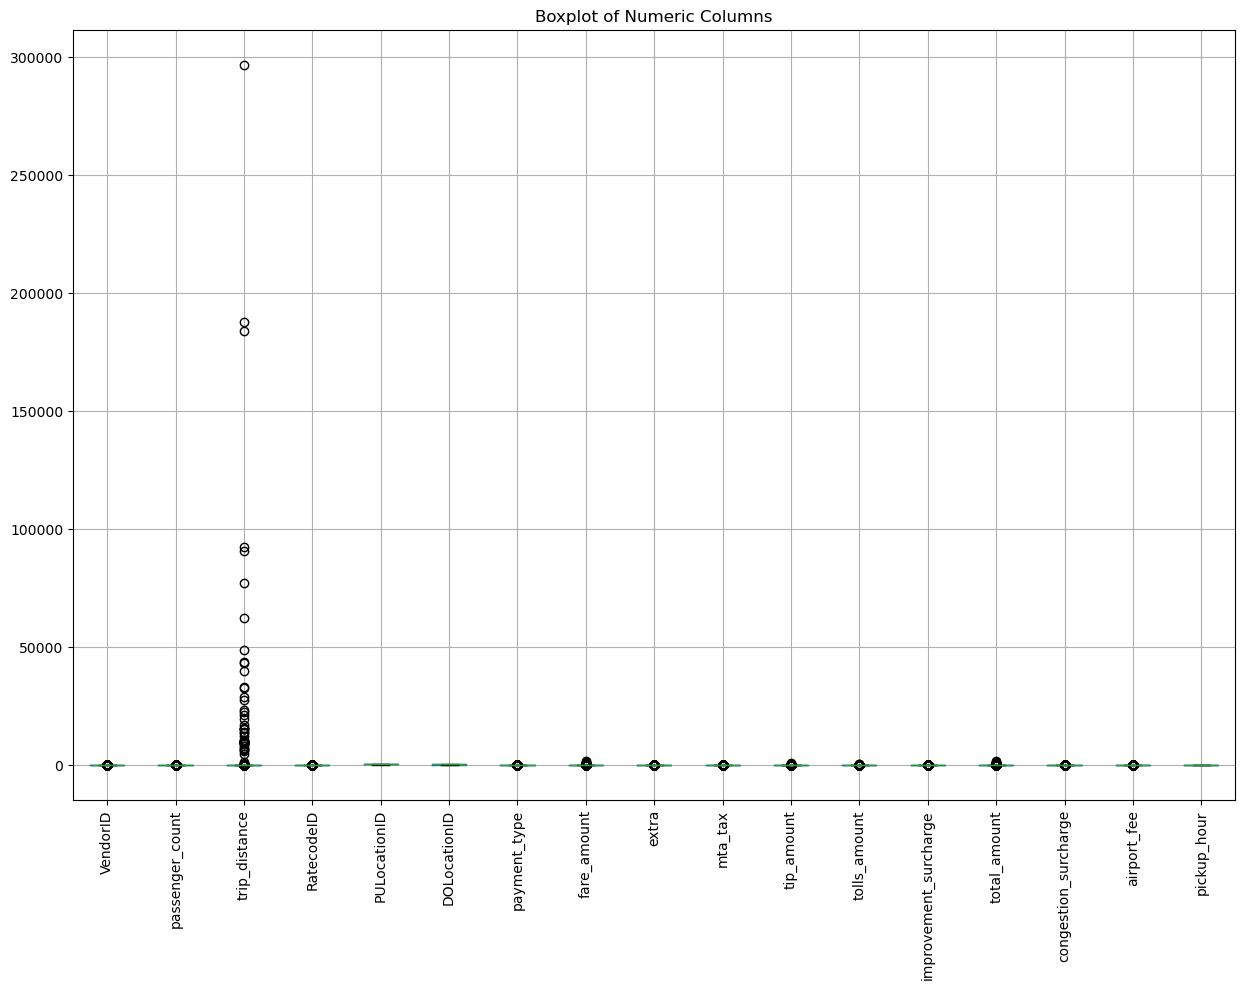

In [65]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot(rot=90)  
plt.title("Boxplot of Numeric Columns")
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [67]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
df.reset_index(drop=True, inplace=True)

In [69]:
# Continue with outlier handling
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
df = df[df['trip_distance'] <= 250]
df = df[df['payment_type'] > 0]
df.reset_index(drop=True, inplace=True)


In [ ]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [71]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [ ]:
Categorical Variables 
VendorID 
RatecodeID 
PULocationID 
DOLocationID 
payment_type 


Numerical Variables
passenger_count 
trip_distance 
trip_duration 
pickup_hour 
Monetary Variables
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge
airport_fee

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [73]:
# Find and show the hourly trends in taxi pickups
df.head()
plt.figure(figsize=(12, 6))
sns.countplot(x=df['pickup_hour'], palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups by Hour")
plt.xticks(range(24))
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5720\2309219299.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['pickup_hour'], palette="viridis")


C:\Users\User\AppData\Local\Temp\ipykernel_5720\14186831.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['pickup_day'], palette="coolwarm")


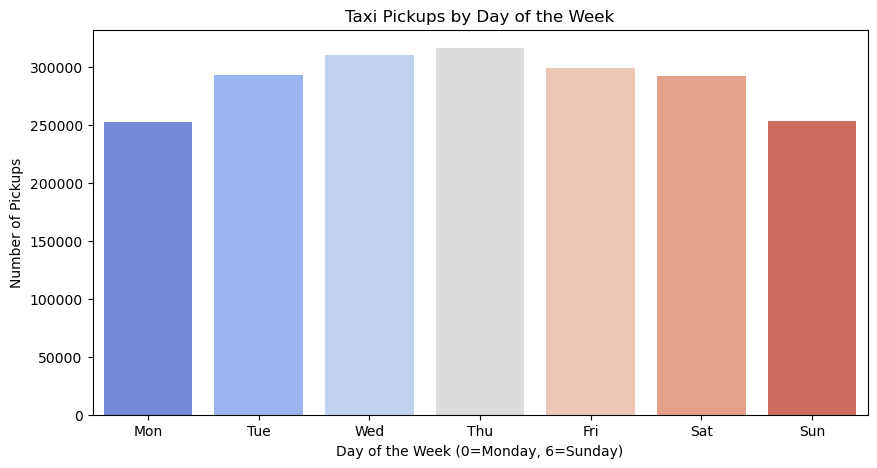

In [75]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek 
plt.figure(figsize=(10, 5))
sns.countplot(x=df['pickup_day'], palette="coolwarm")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups by Day of the Week")
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [77]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
plt.figure(figsize=(10, 5))
sns.countplot(x=df['pickup_month'], palette="magma")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Taxi Pickups by Month")
plt.xticks(range(1, 13))
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5720\1428912607.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['pickup_month'], palette="magma")


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [79]:
# Analyse the above parameters
cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
zero_values = (df[cols_to_check] == 0).sum()
negative_values = (df[cols_to_check] < 0).sum()
print("Zero Values:", zero_values)
print("Negative Values:", negative_values)


Zero Values: fare_amount         559
tip_amount       450210
total_amount        326
trip_distance     24211
dtype: int64
Negative Values: fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [81]:
# Create a df with non zero entries for the selected parameters.
cols_to_filter = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df_non_zero = df[(df[cols_to_filter] != 0).all(axis=1)]
print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape: {df_non_zero.shape}")
df_non_zero.head()


Original DataFrame shape: (2014206, 23)
Filtered DataFrame shape: (1555052, 23)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:54:11   2023-01-01 00:02:30              2.0   
2         2  2023-01-01 00:21:40   2023-01-01 00:33:27              3.0   
3         2  2023-01-01 00:42:44   2023-01-01 01:41:04              1.0   
4         2  2023-01-01 00:31:05   2023-01-01 01:11:40              1.0   
5         1  2023-01-01 00:44:15   2023-01-01 00:47:00              4.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.82         1.0                  N            90           107   
2           2.12         1.0                  N           114           137   
3          12.91         1.0                  N            50            91   
4          19.52         2.0                  N           132           158   
5           0.50         1.0                  N           264           264   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             1  ...        2.04          0.00                    1.0   
2             1  ...        3.56          0.00                    1.0   
3             1  ...       15.65          6.55                    1.0   
4             1  ...       16.72          8.36                    1.0   
5             1  ...        1.95          2.45                    1.0   

   total_amount  congestion_surcharge  airport_fee  pickup_date  pickup_hour  \
0         15.64                   2.5         0.00   2022-12-31           23   
2         21.36                   2.5         0.00   2023-01-01            0   
3         93.90                   2.5         0.00   2023-01-01            0   
4        100.33                   2.5         1.25   2023-01-01            0   
5         12.00                   0.0         0.00   2023-01-01            0   

   pickup_day pickup_month  
0           5           12  
2           6            1  
3           6            1  
4           6            1  
5           6            1  

[5 rows x 23 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [83]:
# Group data by month and analyse monthly revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reset_index()

# Convert period to datetime for proper plotting
monthly_revenue['pickup_month'] = monthly_revenue['pickup_month'].astype(str)

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='pickup_month', y='total_amount', marker='o', color='b')
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.grid()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

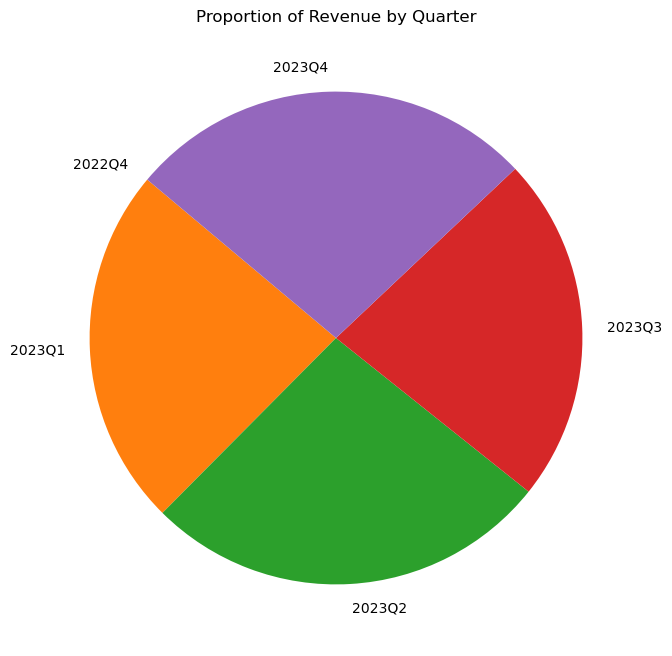

In [85]:
df['quarter'] = df['tpep_pickup_datetime'].dt.to_period("Q")
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()
quarterly_revenue['quarter'] = quarterly_revenue['quarter'].astype(str)
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / quarterly_revenue['total_amount'].sum()
plt.figure(figsize=(8, 8))
plt.pie(quarterly_revenue['proportion'], labels=quarterly_revenue['quarter'], startangle=140)
plt.title("Proportion of Revenue by Quarter")
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [87]:
# Show how trip fare is affected by distance
df_valid = df[df['trip_distance'] > 0]
correlation = df_valid['trip_distance'].corr(df_valid['fare_amount'])
plt.figure(figsize=(10, 6))
sns.regplot(x='trip_distance', y='fare_amount', data=df_valid, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title(f"Trip Distance vs. Fare Amount\nCorrelation: {correlation:.2f}")
plt.grid()
plt.show()
print(f"Correlation coefficient: {correlation:.2f}")



Correlation coefficient: 0.94


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [93]:
# Show relationship between fare and trip duration
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df_valid = df[df['trip_duration'] > 0]
correlation = df_valid['trip_duration'].corr(df_valid['fare_amount'])
plt.figure(figsize=(10, 6))
sns.regplot(x='trip_duration', y='fare_amount', data=df_valid, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.xlabel("Trip Duration")
plt.ylabel("Fare Amount")
plt.title(f"Trip Duration vs. Fare Amount\nCorrelation: {correlation:.2f}")
plt.grid()
plt.show()
print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: 0.27


In [95]:
# Show relationship between fare and number of passengers

df_valid = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]
correlation = df_valid['passenger_count'].corr(df_valid['fare_amount'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df_valid, showfliers=False)
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount")
plt.title(f"Passenger Count vs. Fare Amount\nCorrelation: {correlation:.2f}")
plt.grid()
plt.show()
print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: 0.04


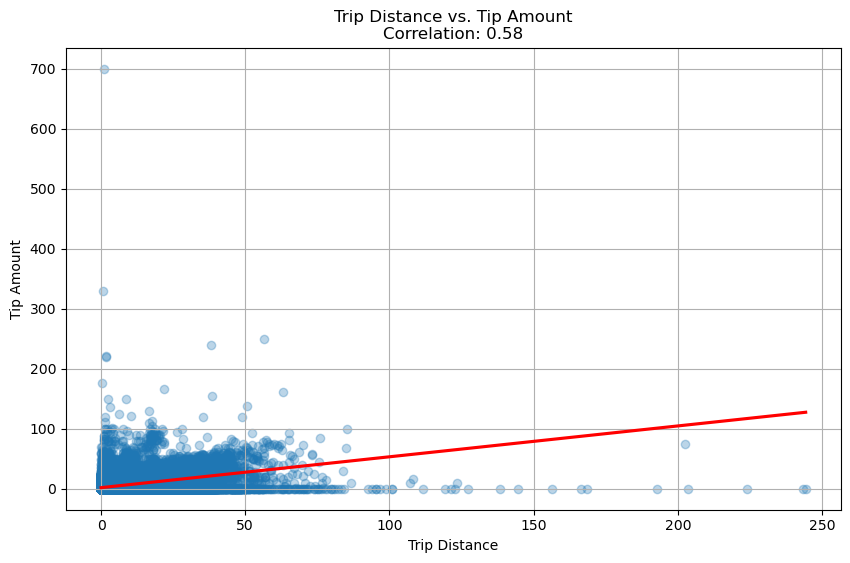

Correlation coefficient: 0.58


In [97]:
# Show relationship between tip and trip distance
df_valid = df[(df['trip_distance'] > 0) & (df['tip_amount'] >= 0)]
correlation = df_valid['trip_distance'].corr(df_valid['tip_amount'])
plt.figure(figsize=(10, 6))
sns.regplot(x='trip_distance', y='tip_amount', data=df_valid, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.xlabel("Trip Distance")
plt.ylabel("Tip Amount")
plt.title(f"Trip Distance vs. Tip Amount\nCorrelation: {correlation:.2f}")
plt.grid()
plt.show()
print(f"Correlation coefficient: {correlation:.2f}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [99]:
# Analyse the distribution of different payment types (payment_type).
payment_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}
df['payment_type'] = df['payment_type'].map(payment_mapping)
payment_counts = df['payment_type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")
plt.xlabel("Payment Type")
plt.ylabel("Count of Transactions")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5720\820143189.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [103]:
# import geopandas as gpd

import geopandas as gpd
# Read the shapefile using geopandas
zones = gpd.read_file("../TaxiZones/taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

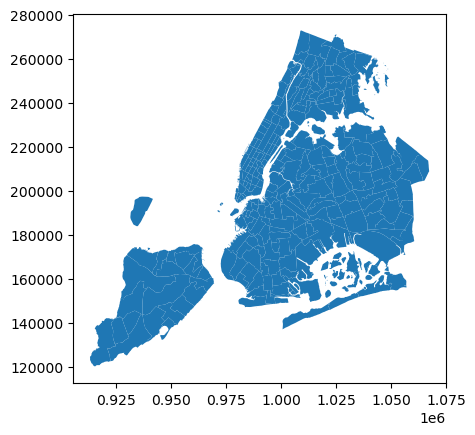

In [105]:
# print(zones.info())
# zones.plot()
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [107]:
# Merge zones and trip records using locationID and PULocationID
trip_data = df.merge(zones[['LocationID', 'zone', 'borough']], 
                            left_on='DOLocationID', right_on='LocationID', 
                            how='left', suffixes=('', '_dropoff'))

trip_data.rename(columns={'zone': 'dropoff_zone', 'borough': 'dropoff_borough'}, inplace=True)
trip_data.drop(columns=['LocationID'], inplace=True)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [109]:
# Group data by location and calculate the number of trips
pickup_counts = trip_data.groupby('PULocationID').size().reset_index(name='total_pickups')
dropoff_counts = trip_data.groupby('DOLocationID').size().reset_index(name='total_dropoffs')
location_counts = pickup_counts.merge(dropoff_counts, 
                                      left_on='PULocationID', 
                                      right_on='DOLocationID', 
                                      how='outer').fillna(0)
location_counts.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
location_counts['total_trips'] = location_counts['total_pickups'] + location_counts['total_dropoffs']
location_counts.drop(columns=['DOLocationID'], inplace=True)
location_counts = location_counts.sort_values(by='total_trips', ascending=False)
location_counts.head(10)

LocationID  total_pickups  total_dropoffs  total_trips
233       237.0        95614.0         85405.0     181019.0
232       236.0        84417.0         89362.0     173779.0
157       161.0        94525.0         78965.0     173490.0
128       132.0       107728.0         23570.0     131298.0
158       162.0        72702.0         57575.0     130277.0
226       230.0        67433.0         62219.0     129652.0
138       142.0        66661.0         56607.0     123268.0
166       170.0        60059.0         59700.0     119759.0
182       186.0        69956.0         44461.0     114417.0
235       239.0        55548.0         56105.0     111653.0

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [111]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(location_counts[['LocationID', 'total_trips']], 
                    left_on='LocationID', right_on='LocationID', 
                    how='left')
zones['total_trips'] = zones['total_trips'].fillna(0)
fig, ax = plt.subplots(figsize=(12, 8))
zones.plot(column='total_trips', cmap='OrRd', linewidth=0.8, edgecolor='black', 
           legend=True, legend_kwds={'label': "Total Trips", 'orientation': "horizontal"}, ax=ax)
ax.set_title("Total Taxi Trips per Zone", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.show()

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

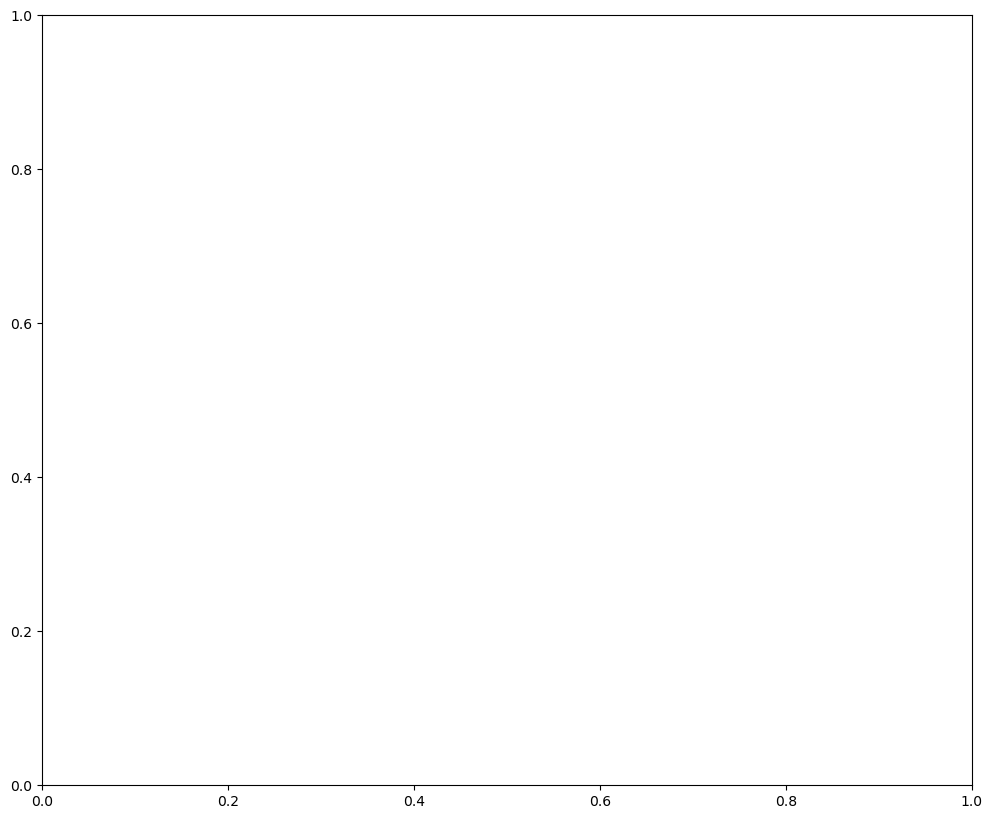

In [113]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
# Plot the map and display it
zones.plot(
    column="total_trips",  # Data column for coloring
    cmap="OrRd",  # Color scheme (Orange-Red)
    linewidth=0.8,  # Outline width
    edgecolor="black",  # Zone borders
    ax=ax,  # Axis to plot on
    legend=True,  # Show legend
    legend_kwds={"label": "Total Taxi Trips", "orientation": "horizontal"}  # Legend settings
)

ax.set_title("Taxi Trip Distribution by Zone", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.show()


In [ ]:
# can you try displaying the zones DF sorted by the number of trips?



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [115]:
# Find routes which have the slowest speeds at different times of the day
df['trip_duration_hours'] = (pd.to_datetime(df['tpep_dropoff_datetime']) - pd.to_datetime(df['tpep_pickup_datetime'])).dt.total_seconds() / 3600
df_valid = df[(df['trip_distance'] > 0) & (df['trip_duration_hours'] > 0)]
df_valid['speed_mph'] = df_valid['trip_distance'] / df_valid['trip_duration_hours']
df_valid['hour_of_day'] = pd.to_datetime(df_valid['tpep_pickup_datetime']).dt.hour
df_valid['time_of_day'] = pd.cut(df_valid['hour_of_day'], 
                                 bins=[0, 6, 12, 18, 24], 
                                 labels=['Night', 'Morning', 'Afternoon', 'Evening'], 
                                 right=False)
slowest_routes = df_valid.groupby(['time_of_day', 'PULocationID', 'DOLocationID'])['speed_mph'].mean().reset_index()
slowest_routes = slowest_routes.sort_values(['time_of_day', 'speed_mph']).groupby('time_of_day').first()
print(slowest_routes[['PULocationID', 'DOLocationID', 'speed_mph']])

C:\Users\User\AppData\Local\Temp\ipykernel_5720\3341411481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['speed_mph'] = df_valid['trip_distance'] / df_valid['trip_duration_hours']
C:\Users\User\AppData\Local\Temp\ipykernel_5720\3341411481.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['hour_of_day'] = pd.to_datetime(df_valid['tpep_pickup_datetime']).dt.hour
C:\Users\User\AppData\Local\Temp\ipykernel_5720\3341411481.py:6: SettingWithCopyWarning: 
A value is trying to be set on a 

             PULocationID  DOLocationID  speed_mph
time_of_day                                       
Night                 258           258   0.026230
Morning               207           141   0.007777
Afternoon              42           113   0.028697
Evening                82            43   0.006324


C:\Users\User\AppData\Local\Temp\ipykernel_5720\3341411481.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  slowest_routes = slowest_routes.sort_values(['time_of_day', 'speed_mph']).groupby('time_of_day').first()


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [117]:
# Visualise the number of trips per hour and find the busiest hour
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
trips_per_hour = df['pickup_hour'].value_counts().sort_index()
busiest_hour = trips_per_hour.idxmax()
max_trips = trips_per_hour.max()
plt.figure(figsize=(10, 5))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette="viridis")
plt.axvline(x=busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour}:00')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Taxi Trips Per Hour")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
print(f"🟢 The busiest hour is {busiest_hour}:00 with {max_trips} trips.")


C:\Users\User\AppData\Local\Temp\ipykernel_5720\3092457634.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette="viridis")


🟢 The busiest hour is 18:00 with 142322 trips.


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [119]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
# Count trips per hour
trips_per_hour = df['pickup_hour'].value_counts().sort_values(ascending=False)
# Get the top 5 busiest hours
top_5_hours = trips_per_hour.head(5)
# Display results
print("🚖 Top 5 Busiest Hours and Their Trip Counts:")
print(top_5_hours)


🚖 Top 5 Busiest Hours and Their Trip Counts:
pickup_hour
18    142322
17    136052
19    127603
16    125806
15    125697
Name: count, dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [123]:
# Compare traffic trends for the week days and weekends
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek  
weekday_df = df[df['pickup_day'] < 5] 
weekend_df = df[df['pickup_day'] >= 5]
weekday_hourly = weekday_df.groupby('pickup_hour').size()
weekend_hourly = weekend_df.groupby('pickup_hour').size()
plt.figure(figsize=(12, 6))
sns.lineplot(x=weekday_hourly.index, y=weekday_hourly.values, label="Weekdays", marker="o")
sns.lineplot(x=weekend_hourly.index, y=weekend_hourly.values, label="Weekends", marker="o", linestyle="dashed")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Taxi Traffic: Weekdays vs. Weekends")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

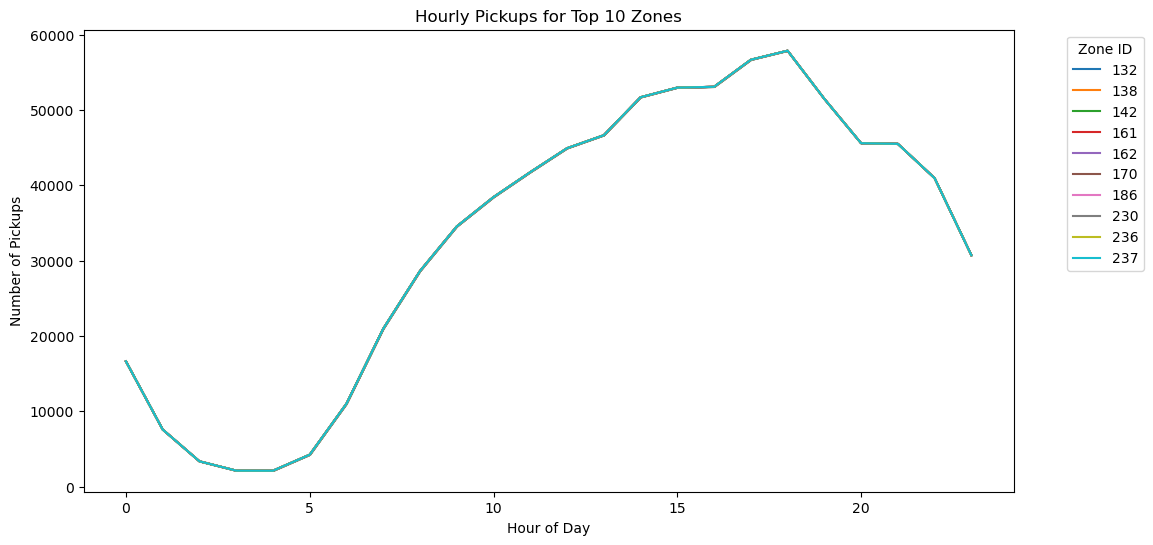

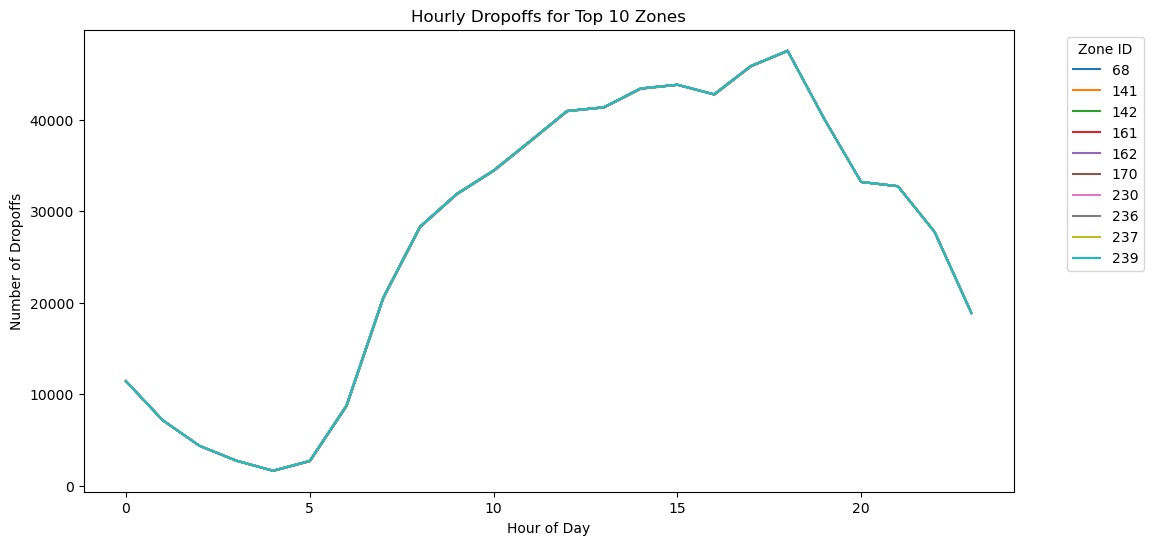

In [125]:
# Find top 10 pickup and dropoff zones
top_pickup_zones = trip_data.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')
top_dropoff_zones = trip_data.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='dropoff_count')
top_10_pickups = top_pickup_zones.groupby("PULocationID")['pickup_count'].sum().nlargest(10).reset_index()
top_10_dropoffs = top_dropoff_zones.groupby("DOLocationID")['dropoff_count'].sum().nlargest(10).reset_index()
top_10_pickups = top_10_pickups.merge(zones, left_on="PULocationID", right_on="LocationID")
top_10_dropoffs = top_10_dropoffs.merge(zones, left_on="DOLocationID", right_on="LocationID")
top_pickup_data = trip_data[trip_data['PULocationID'].isin(top_10_pickups['PULocationID'])]
top_dropoff_data = trip_data[trip_data['DOLocationID'].isin(top_10_dropoffs['DOLocationID'])]
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_pickup_data, x="pickup_hour", y=top_pickup_data.groupby("pickup_hour")["PULocationID"].transform('count'), hue="PULocationID", palette="tab10")
plt.title("Hourly Pickups for Top 10 Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.legend(title="Zone ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_dropoff_data, x="pickup_hour", y=top_dropoff_data.groupby("pickup_hour")["DOLocationID"].transform('count'), hue="DOLocationID", palette="tab10")
plt.title("Hourly Dropoffs for Top 10 Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Dropoffs")
plt.legend(title="Zone ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [127]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = trip_data.groupby("PULocationID").size().reset_index(name="pickup_count")
dropoff_counts = trip_data.groupby("DOLocationID").size().reset_index(name="dropoff_count")
zone_ratios = pickup_counts.merge(dropoff_counts, left_on="PULocationID", right_on="DOLocationID", how="outer").fillna(0)
zone_ratios["pickup_drop_ratio"] = zone_ratios["pickup_count"] / (zone_ratios["dropoff_count"] + 1e-6) 
zone_ratios = zone_ratios.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")
top_10_highest = zone_ratios.nlargest(10, "pickup_drop_ratio")[["zone", "pickup_drop_ratio"]]
top_10_lowest = zone_ratios.nsmallest(10, "pickup_drop_ratio")[["zone", "pickup_drop_ratio"]]
print("Top 10 Highest Pickup/Dropoff Ratios:")
print(top_10_highest)

print("Top 10 Lowest Pickup/Dropoff Ratios:")
print(top_10_lowest)


Top 10 Highest Pickup/Dropoff Ratios:
                             zone  pickup_drop_ratio
196                 Rikers Island     1000000.000000
70                  East Elmhurst           8.409132
129                   JFK Airport           4.570556
135             LaGuardia Airport           2.884976
183  Penn Station/Madison Sq West           1.573424
111       Greenwich Village South           1.373390
42                   Central Park           1.355849
246                  West Village           1.338805
159                  Midtown East           1.262736
100              Garment District           1.205031
Top 10 Lowest Pickup/Dropoff Ratios:
                          zone  pickup_drop_ratio
1                          NaN           0.000000
59                         NaN           0.000000
84                         NaN           0.000000
108                        NaN           0.000000
173                        NaN           0.000000
203  Saint George/New Brighton           0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [129]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
trip_data["pickup_hour"] = pd.to_datetime(trip_data["tpep_pickup_datetime"]).dt.hour
night_trips = trip_data[(trip_data["pickup_hour"] >= 23) | (trip_data["pickup_hour"] <= 5)]
night_pickups = night_trips.groupby("PULocationID").size().reset_index(name="night_pickup_count")
night_dropoffs = night_trips.groupby("DOLocationID").size().reset_index(name="night_dropoff_count")
night_traffic = night_pickups.merge(night_dropoffs, left_on="PULocationID", right_on="DOLocationID", how="outer").fillna(0)
night_traffic = night_traffic.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")
top_10_night_pickups = night_traffic.nlargest(10, "night_pickup_count")[["zone", "night_pickup_count"]]
top_10_night_dropoffs = night_traffic.nlargest(10, "night_dropoff_count")[["zone", "night_dropoff_count"]]
print("Top 10 Zones for Nighttime Pickups (11PM-5AM):")
print(top_10_night_pickups)
print("Top 10 Zones for Nighttime Dropoffs (11PM-5AM):")
print(top_10_night_dropoffs)


Top 10 Zones for Nighttime Pickups (11PM-5AM):
                             zone  night_pickup_count
78                   East Village             17020.0
127                   JFK Airport             16359.0
243                  West Village             13790.0
46                   Clinton East             11510.0
143               Lower East Side             10568.0
109       Greenwich Village South              9519.0
224     Times Sq/Theatre District              8998.0
181  Penn Station/Madison Sq West              7840.0
67                   East Chelsea              6691.0
133             LaGuardia Airport              6689.0
Top 10 Zones for Nighttime Dropoffs (11PM-5AM):
                          zone  night_dropoff_count
78                East Village               9068.0
46                Clinton East               7656.0
165                Murray Hill               7217.0
67                East Chelsea               6363.0
103                   Gramercy               6169.0

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [131]:
# Filter for night hours (11 PM to 5 AM)
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
night_hours = list(range(23, 24)) + list(range(0, 6))  # 11 PM - 5 AM
day_hours = list(range(6, 23))  # 6 AM - 10 PM
night_revenue = df[df['pickup_hour'].isin(night_hours)]['total_amount'].sum()
day_revenue = df[df['pickup_hour'].isin(day_hours)]['total_amount'].sum()
total_revenue = night_revenue + day_revenue
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100
print(f"Nighttime Revenue Share: {night_share:.2f}%")
print(f"Daytime Revenue Share: {day_share:.2f}%")
labels = ["Nighttime", "Daytime"]
values = [night_share, day_share]

# Create Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=90, explode=[0.05, 0])

# Title
plt.title("🕰️ Revenue Share: Nighttime vs. Daytime")

# Show plot
plt.show()


Nighttime Revenue Share: 12.13%
Daytime Revenue Share: 87.87%


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128368 (\N{MANTELPIECE CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [133]:
# Analyse the fare per mile per passenger for different passenger counts
df_filtered = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']
df_filtered['fare_per_mile_per_passenger'] = df_filtered['fare_per_mile'] / df_filtered['passenger_count']
fare_per_passenger_summary = df_filtered.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
print(fare_per_passenger_summary)



   passenger_count  fare_per_mile_per_passenger
0              1.0                    10.868220
1              2.0                     6.346562
2              3.0                     3.857362
3              4.0                     4.395696
4              5.0                     1.716253
5              6.0                     1.509392


C:\Users\User\AppData\Local\Temp\ipykernel_5720\3853145590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']
C:\Users\User\AppData\Local\Temp\ipykernel_5720\3853145590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['fare_per_mile_per_passenger'] = df_filtered['fare_per_mile'] / df_filtered['passenger_count']


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [135]:
# Compare the average fare per mile for different days and for different times of the day
import pandas as pd
df_filtered = df[df['trip_distance'] > 0].copy()
df_filtered['pickup_hour'] = df_filtered['tpep_pickup_datetime'].dt.hour
df_filtered['pickup_day'] = df_filtered['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']
fare_by_hour = df_filtered.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
fare_by_day = df_filtered.groupby('pickup_day')['fare_per_mile'].mean().reset_index()
day_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
fare_by_day['pickup_day'] = fare_by_day['pickup_day'].map(day_mapping)
print("Average Fare Per Mile by Hour:")
print(fare_by_hour)
print("\nAverage Fare Per Mile by Day of the Week:")
print(fare_by_day)



Average Fare Per Mile by Hour:
    pickup_hour  fare_per_mile
0             0      10.498596
1             1      10.260065
2             2      11.484276
3             3      11.918446
4             4      15.678950
5             5      15.798034
6             6      10.528053
7             7      10.044944
8             8       9.956211
9             9      10.545957
10           10      11.101641
11           11      10.829450
12           12      11.463396
13           13      12.690830
14           14      11.550133
15           15      13.044373
16           16      13.000948
17           17      12.249253
18           18      11.504615
19           19      11.054628
20           20       9.697557
21           21       9.683336
22           22      10.021862
23           23       9.916484

Average Fare Per Mile by Day of the Week:
  pickup_day  fare_per_mile
0     Monday      10.837062
1    Tuesday      10.783346
2  Wednesday      11.323498
3   Thursday      11.698420
4     Frida

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [137]:
# Compare fare per mile for different vendors
df_filtered = df[df['trip_distance'] > 0].copy()
df_filtered['pickup_hour'] = df_filtered['tpep_pickup_datetime'].dt.hour
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']
fare_by_vendor_hour = df_filtered.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()
print("📊 Average Fare Per Mile by Vendor & Hour:")
print(fare_by_vendor_hour.head())


📊 Average Fare Per Mile by Vendor & Hour:
   VendorID  pickup_hour  fare_per_mile
0         1            0       6.726475
1         1            1       6.827705
2         1            2       6.843741
3         1            3       6.780428
4         1            4       7.768042


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [139]:
# Defining distance tiers
df_filtered = df[df['trip_distance'] > 0].copy()
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']
def categorize_distance(distance):
    if distance <= 2:
        return "Short (≤2 miles)"
    elif 2 < distance <= 5:
        return "Medium (2-5 miles)"
    else:
        return "Long (>5 miles)"
df_filtered['distance_category'] = df_filtered['trip_distance'].apply(categorize_distance)
fare_by_vendor_distance = df_filtered.groupby(['VendorID', 'distance_category'])['fare_per_mile'].mean().reset_index()
print("Average Fare Per Mile by Vendor & Distance Category:")
print(fare_by_vendor_distance)
plt.figure(figsize=(10, 5))
sns.barplot(x="distance_category", y="fare_per_mile", hue="VendorID", data=fare_by_vendor_distance, palette="Set1")
plt.title("Tiered Average Fare Per Mile by Vendor")
plt.xlabel("Trip Distance Category")
plt.ylabel("Average Fare Per Mile ")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="VendorID", labels=["Creative Mobile Technologies", "VeriFone"])
plt.show()


Average Fare Per Mile by Vendor & Distance Category:
   VendorID   distance_category  fare_per_mile
0         1     Long (>5 miles)       4.420796
1         1  Medium (2-5 miles)       6.385018
2         1    Short (≤2 miles)       9.883025
3         2     Long (>5 miles)       4.504657
4         2  Medium (2-5 miles)       6.553758
5         2    Short (≤2 miles)      17.774743


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

C:\Users\User\AppData\Local\Temp\ipykernel_5720\742500608.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_distance = df_filtered.groupby('distance_category')['tip_percentage'].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_5720\742500608.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_by_time = df_filtered.groupby('pickup_period')['tip_percentage'].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_5720\742500608.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the s

Average Tip Percentage by Trip Distance:
distance_category
Short (≤2 miles)         22.698631
Medium (2-5 miles)       19.137017
Long (5-10 miles)        17.292581
Very Long (>10 miles)    24.036131
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:
passenger_count
0.0    19.896622
1.0    22.149895
2.0    21.340183
3.0    18.966432
4.0    17.534381
5.0    28.116918
6.0    20.636073
Name: tip_percentage, dtype: float64

Average Tip Percentage by Time of Pickup:
pickup_period
Night (12AM-5AM)        33.433310
Morning (6AM-11AM)      19.477558
Afternoon (12PM-5PM)    20.230643
Evening (6PM-11PM)      22.422631
Name: tip_percentage, dtype: float64


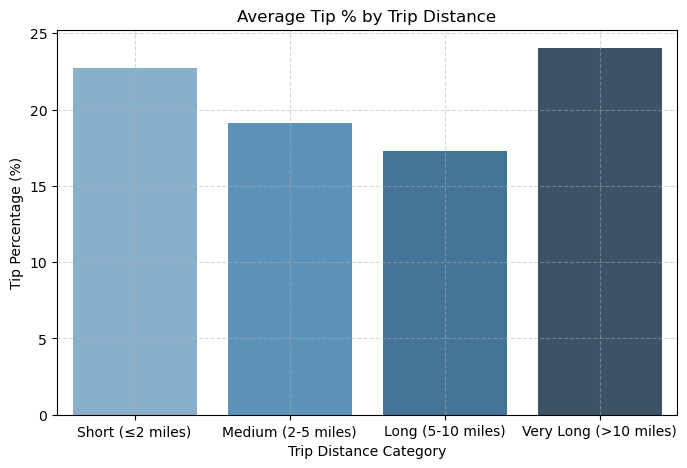

C:\Users\User\AppData\Local\Temp\ipykernel_5720\742500608.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tip_by_passenger.index, y=tip_by_passenger.values, palette="Greens_d")


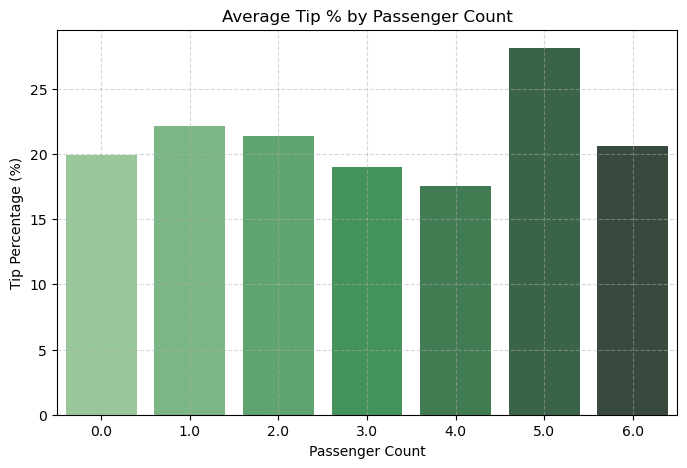

C:\Users\User\AppData\Local\Temp\ipykernel_5720\742500608.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tip_by_time.index, y=tip_by_time.values, palette="Oranges_d")


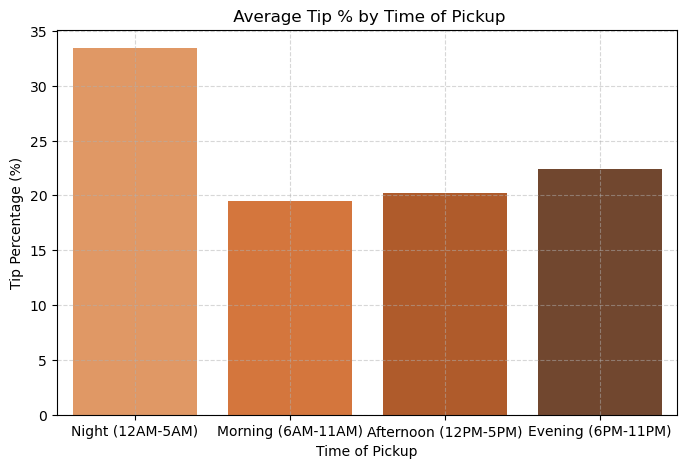

In [141]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_filtered = df[df['fare_amount'] > 0].copy()
df_filtered['tip_percentage'] = (df_filtered['tip_amount'] / df_filtered['fare_amount']) * 100
df_filtered['distance_category'] = pd.cut(df_filtered['trip_distance'], bins=[0, 2, 5, 10, np.inf], 
                                          labels=['Short (≤2 miles)', 'Medium (2-5 miles)', 'Long (5-10 miles)', 'Very Long (>10 miles)'])
df_filtered['pickup_period'] = pd.cut(df_filtered['pickup_hour'], bins=[0, 5, 11, 17, 23], 
                                      labels=['Night (12AM-5AM)', 'Morning (6AM-11AM)', 'Afternoon (12PM-5PM)', 'Evening (6PM-11PM)'], include_lowest=True)
tip_by_distance = df_filtered.groupby('distance_category')['tip_percentage'].mean()
tip_by_passenger = df_filtered.groupby('passenger_count')['tip_percentage'].mean()
tip_by_time = df_filtered.groupby('pickup_period')['tip_percentage'].mean()
print("Average Tip Percentage by Trip Distance:")
print(tip_by_distance)
print("\nAverage Tip Percentage by Passenger Count:")
print(tip_by_passenger)
print("\nAverage Tip Percentage by Time of Pickup:")
print(tip_by_time)
plt.figure(figsize=(8,5))
sns.barplot(x=tip_by_distance.index, y=tip_by_distance.values, palette="Blues_d")
plt.title("Average Tip % by Trip Distance")
plt.xlabel("Trip Distance Category")
plt.ylabel("Tip Percentage (%)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
plt.figure(figsize=(8,5))
sns.barplot(x=tip_by_passenger.index, y=tip_by_passenger.values, palette="Greens_d")
plt.title("Average Tip % by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Tip Percentage (%)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
plt.figure(figsize=(8,5))
sns.barplot(x=tip_by_time.index, y=tip_by_time.values, palette="Oranges_d")
plt.title(" Average Tip % by Time of Pickup")
plt.xlabel("Time of Pickup")
plt.ylabel("Tip Percentage (%)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

Average Passenger Count by Hour:
pickup_hour
0     1.420098
1     1.433851
2     1.432774
3     1.438344
4     1.404275
5     1.268386
6     1.234421
7     1.262783
8     1.276675
9     1.299919
10    1.330234
11    1.351214
12    1.362015
13    1.367651
14    1.384504
15    1.390717
16    1.390784
17    1.373615
18    1.371264
19    1.378518
20    1.392562
21    1.410980
22    1.411927
23    1.414503
Name: passenger_count, dtype: float64

Average Passenger Count by Day of the Week:
pickup_day
Monday       1.345845
Tuesday      1.317649
Wednesday    1.318284
Thursday     1.328508
Friday       1.385650
Saturday     1.465147
Sunday       1.448813
Name: passenger_count, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_5720\1701511742.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=passenger_by_day.index, y=passenger_by_day.values, palette="coolwarm")


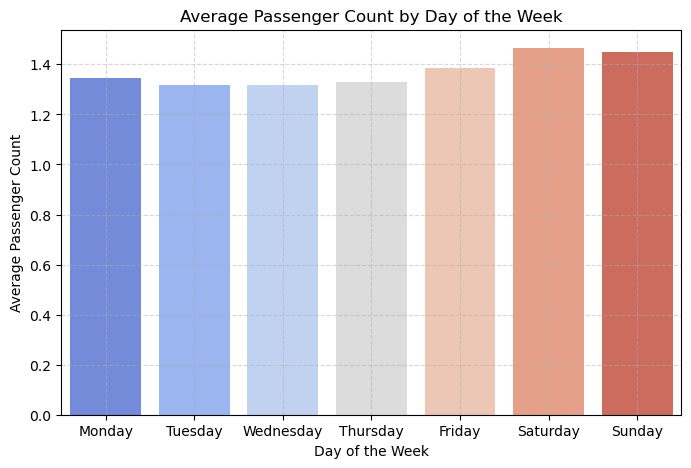

In [143]:
# See how passenger count varies across hours and days
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
passenger_by_hour = df.groupby('pickup_hour')['passenger_count'].mean()
passenger_by_day = df.groupby('pickup_day')['passenger_count'].mean()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
passenger_by_day = passenger_by_day.reindex(day_order)
print("Average Passenger Count by Hour:")
print(passenger_by_hour)
print("\nAverage Passenger Count by Day of the Week:")
print(passenger_by_day)
plt.figure(figsize=(10,5))
sns.lineplot(x=passenger_by_hour.index, y=passenger_by_hour.values, marker='o', color='b')
plt.title("Average Passenger Count by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
plt.figure(figsize=(8,5))
sns.barplot(x=passenger_by_day.index, y=passenger_by_day.values, palette="coolwarm")
plt.title("Average Passenger Count by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [145]:
# How does passenger count vary across zones
passenger_stats = trip_data.groupby("PULocationID").agg(
    avg_passenger_count=("passenger_count", "mean"),
    total_passenger_count=("passenger_count", "sum"),
    trip_count=("passenger_count", "count")
).reset_index()
passenger_stats = passenger_stats.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

In [147]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
top_zones = passenger_stats.nlargest(10, "avg_passenger_count")[["zone", "avg_passenger_count", "trip_count"]]
bottom_zones = passenger_stats.nsmallest(10, "avg_passenger_count")[["zone", "avg_passenger_count", "trip_count"]]
print("\nTop 10 Zones with Highest Avg Passengers per Trip:")
print(top_zones)
print("\nBottom 10 Zones with Lowest Avg Passengers per Trip:")
print(bottom_zones)



Top 10 Zones with Highest Avg Passengers per Trip:
                             zone  avg_passenger_count  trip_count
57                   Country Club             2.333333           3
237                 West Brighton             2.000000           1
4         Arrochar/Fort Wadsworth             1.944444          18
10                   Battery Park             1.783582         938
0                  Newark Airport             1.783088         272
187                      Red Hook             1.700000         180
64             DUMBO/Vinegar Hill             1.639309         463
249               Windsor Terrace             1.617647          34
90   Flushing Meadows-Corona Park             1.569231         455
253            World Trade Center             1.541603       10456

Bottom 10 Zones with Lowest Avg Passengers per Trip:
                        zone  avg_passenger_count  trip_count
165   New Dorp/Midland Beach             0.666667           3
213                Stapleton     

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [149]:
# How often is each surcharge applied?
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
extra_per_hour = df.groupby('pickup_hour')['extra'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=extra_per_hour.index, y=extra_per_hour.values, palette="magma")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Extra Charge")
plt.title("Average Extra Charges by Hour of Day")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_5720\3107836851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=extra_per_hour.index, y=extra_per_hour.values, palette="magma")


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.